# Deep Learning Algorithms - Artificial Neural Networks (ANNs)

This notebook will cover modern deep-learning algorithms, the intuition behind them, and some common use-cases. 

**Topics:**



1.   Deep Learning Overview
2.   The ANN
3.   Open-Source & Pre-Trained Models


**Goals:**



1.   Differentiate between the different types of ANNs
2.   Develop a basic ANN with Keras
3.   Understand how to utilize pre-trained models


## Import Packages

We are importing [Tensorflow](https://www.tensorflow.org/) & [Keras](https://keras.io/), two new packages. Probably the most widely used deep-learning framework in the world.

* **Keras:** High-level deep-learning API that runs on Tensorflow
* **Tensorflow:** Deep-learning framework that supports GPUs & multiple languages (Python/C++/Java/etc..)
* **Pandas:** Working with datasets. Arguably the most widely-used data-science Python package.

* **NumPy:** Scientific computing package for working with vectors & matrices.

* **MatplotLib:** Tool for dataset vizualizations.

* **Seaborn:** Tool for dataset vizualizations.

* **Sci-Kit Learn:** Open-source ML algorithms.

* **OpenCV:** Open-source computer vision algorithms.

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import tensorflow as tf, numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import cv2

## Deep Learning Overview

This is somewhat review from the lecutures on days 1 & 2. Here is the sequence of events to be aware of inside a neural-net. 


1.   We have our inputs (data matrix), we combine them with the weights
2.   The input of Layer[L] is the output of Layer[L-1]
3.   Model iteratively adjusts the trainable parameters to minimize a loss function



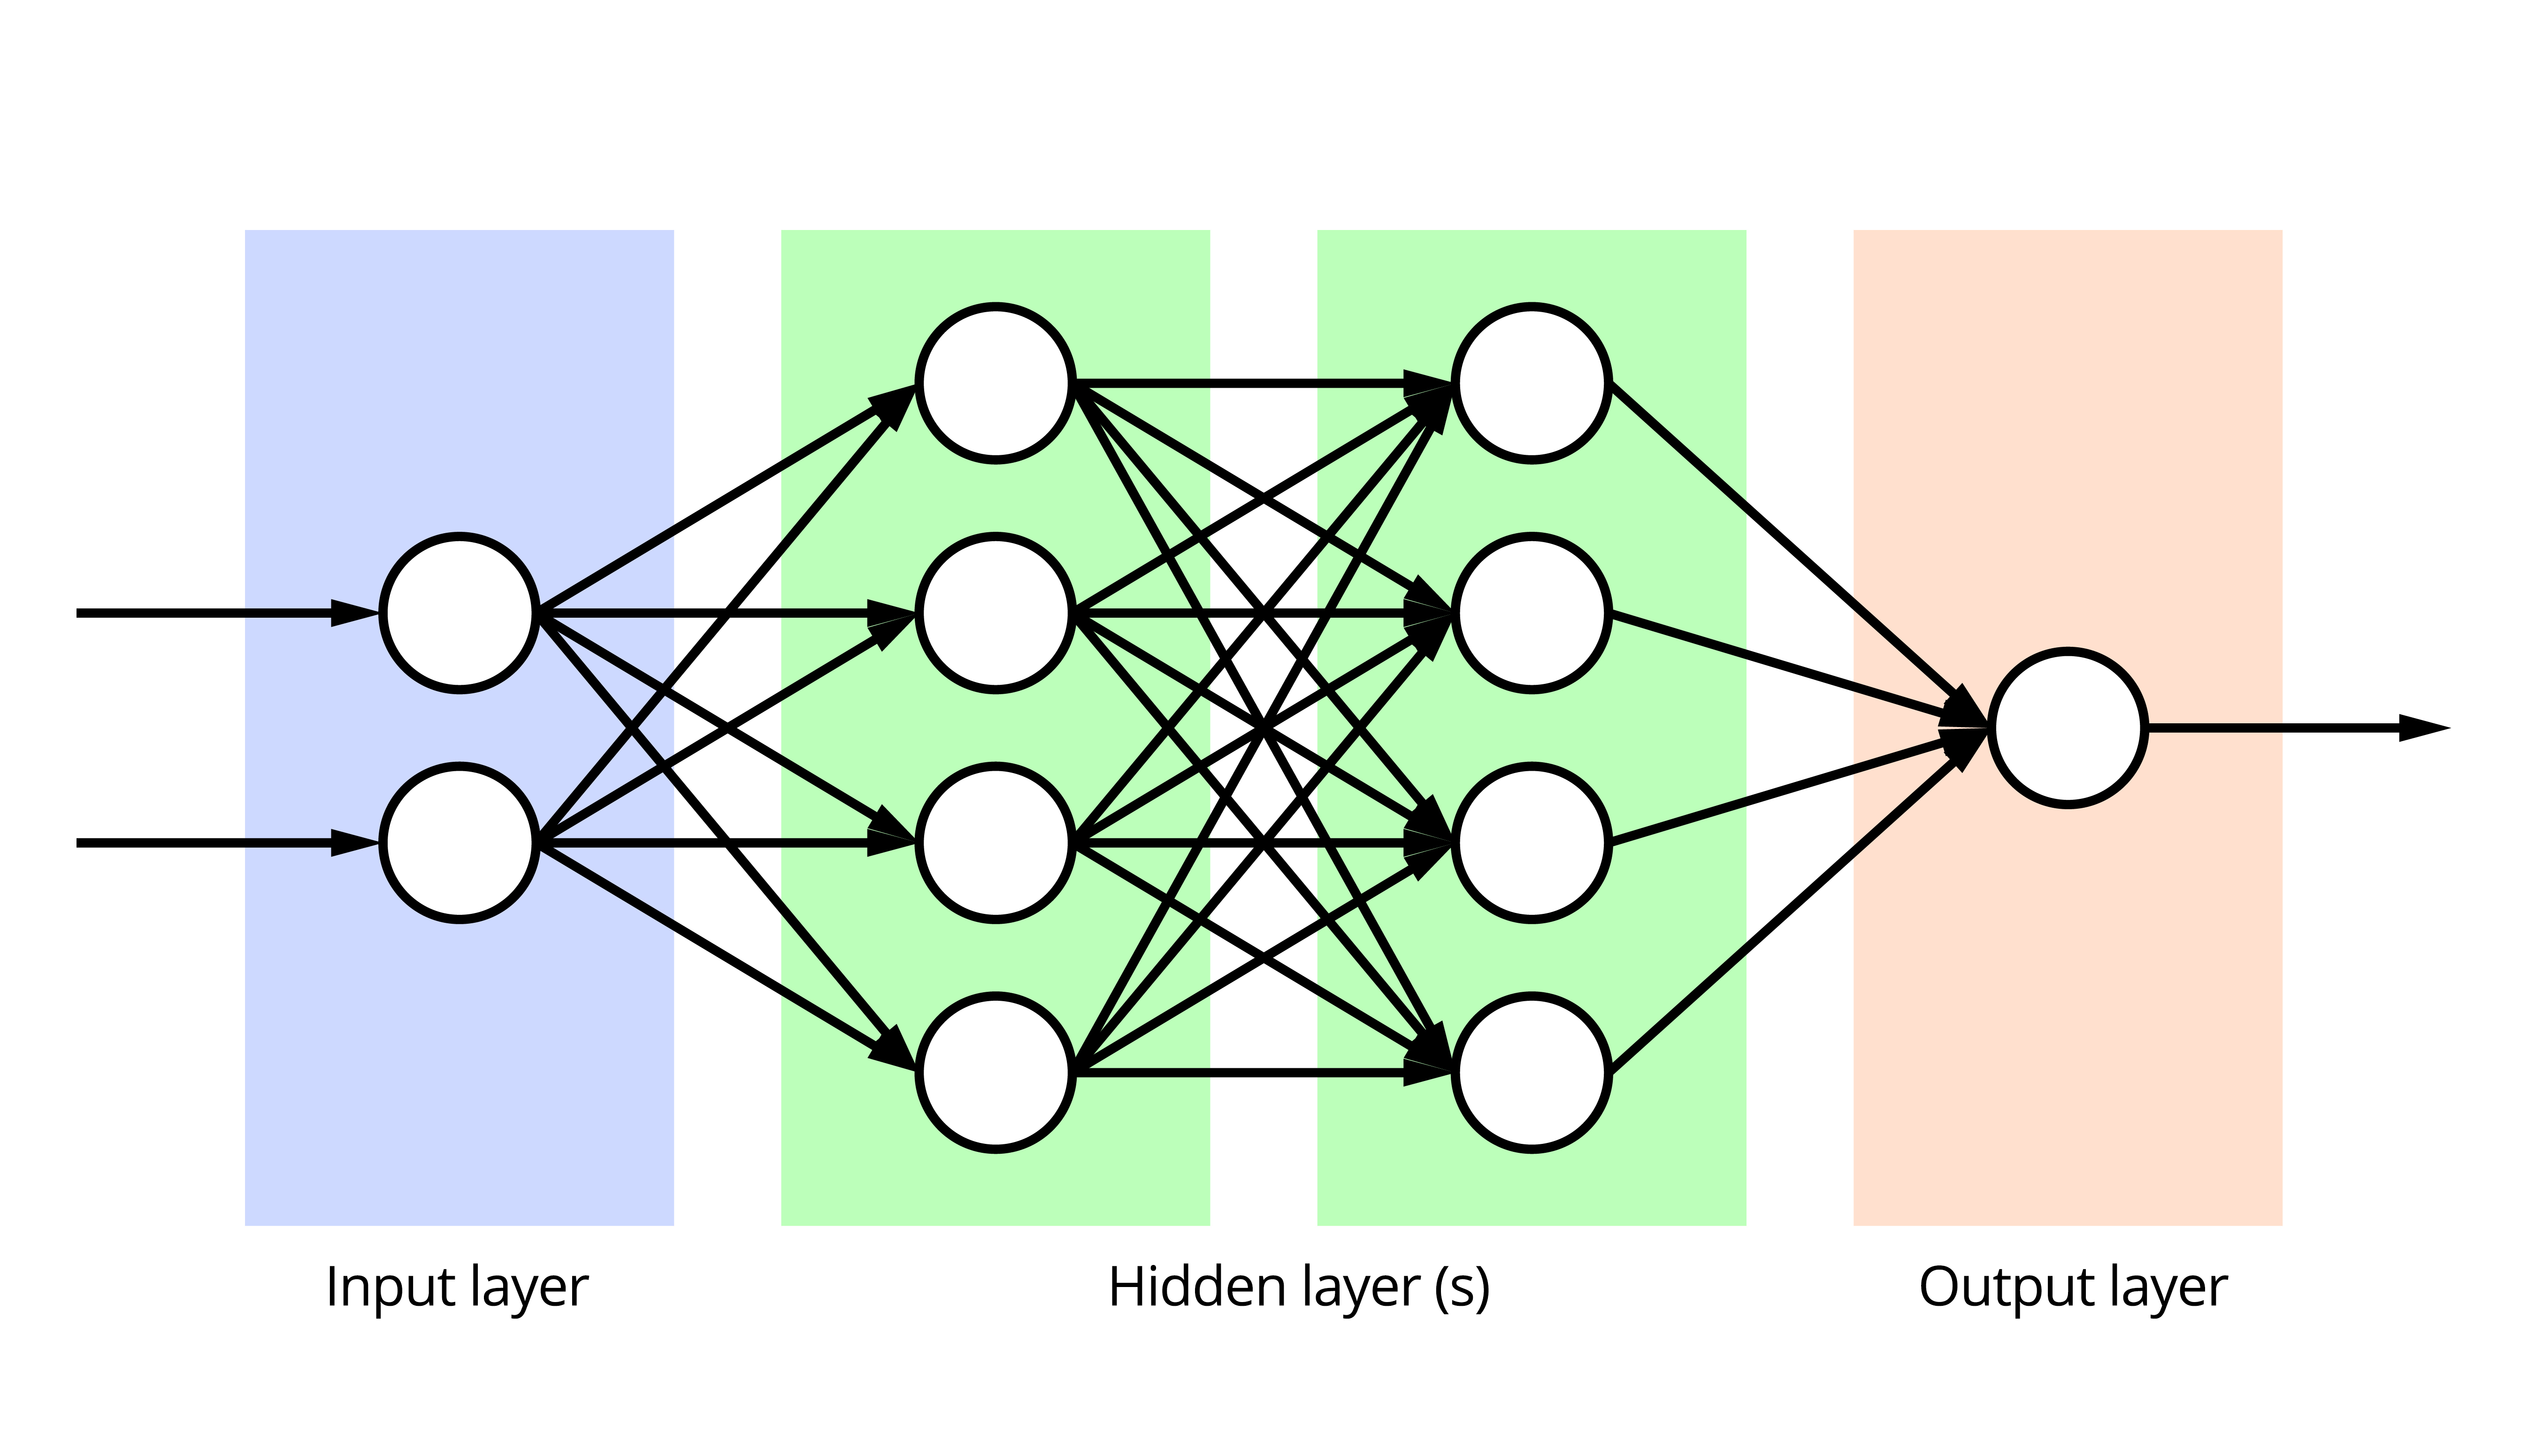

***Breaking it down***

\begin{equation}
\hat{y} = \sigma(X \bullet W)
\end{equation}

The output for a single layer.

Where the sigma denotes the sigmoid function. Note, this is a hyper-parameter of an ANN. We can choose the activation function. 

Some commonly used activation functions are:

<br>
<br>

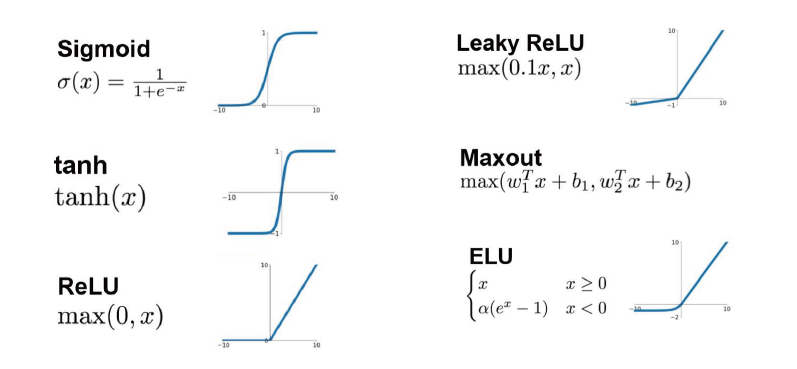

This may look complex, but it is actually quite simple. This function is simply applied to each value in a vector or matrix individually (AKA element-wise). 

***Example***

Note - the output is a 'tensor' as opposed to a NumPy array. Basically the only difference that matters to us is tensor computations can take place on a GPU, and NumPy arrays cannot.

In [1]:
# Compute sigmoid output at layer 'L'
## TODO: YOUR CODE HERE ##

## Feature Engineering

We will start by preparing our data for the model.

### Data

Classification dataset with two classes, heart disease or not. We want to train a model to correctly classify the probability of heart disease given other biological information.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/j0sephsasson/Pepsi-Training-Course/main/datasets/heart.csv', index_col=0)
data.head()

**Examine Dataset**

In [3]:
# Examine null count
## TODO: YOUR CODE HERE ##

In [4]:
# Examine num of samples
## TODO: YOUR CODE HERE ##

In [5]:
# Examine class balance
## TODO: YOUR CODE HERE ##

**Split Data for train/test**

In [6]:
## TODO: YOUR CODE HERE ##

### Feature Eng w/ OOP

Let's bring back the feature engineering functions from day 5. Except this time, we will implement it slightly differently, so the code is re-useable and more readable.

We will use the exact same functions, just format them slightly different. We will use a 'class'. This should be familiar from a previous lesson. ***Classes (aka objects) have methods (aka functions) and attributes (aka variables).***

In [7]:
# Create feature engineering class
## TODO: YOUR CODE HERE ##

Notice we are simply calling 'fit' & 'transform', the same way we use Sci-Kit Learn. 

***Yes, open-source software is just code.*** 😲

In [8]:
# Initialize class, call fit/transform methods
## TODO: YOUR CODE HERE ##

## The Basic ANN

We will now build a simple feed-forward ANN. In practice, we generally do not use ANNs for tabular data. We are using this dataset for educational purposes. ***ANNs are reserved for unstructured, image and text processing use-cases***.

The code we are utilizing (keras) was developed over the course of years, by teams of research scientists at Google.

The computational mathematics (theory and implementation), behind these next 7 lines of code could easily be an entire course in-and-of itself, so we will not do a *deep-dive*, however it is fascinating and I encourage you to do some research in your free time if interested.

Here are some resources:


*   https://betterexplained.com/articles/series/vector-calculus/
*   https://towardsdatascience.com/coding-a-neural-network-from-scratch-in-numpy-31f04e4d605



### Model 1 - Heart Dataset

Main things to be aware of here:


1.   ***'tf.keras.utils.to_categorical':*** one hot encoding the target variable.


*   One-hot encoding is actually quite simple. We have two classes, values either 0 or 1. See the below example.
*   regular_inputs = [0,0,1,...]
*   one_hot = [[1,0], [1,0], [0,1]]
*   We are simply creating a new vector for each sample, that has a 1 in the index of the class and zeros everywhere else.
*   This can be extrapolated to any number of classes.



<br>

2.   ***'model.compile(SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])':*** setting the model parameters and architechture so we can train.



*   SGD: the optimizer algorithm used to update the internal parameters
*   loss: the function used to calculate the loss, also the function the model will train to minimize.





**Training**

In [9]:
# Step 1: one-hot-encode target variable
## TODO: YOUR CODE HERE ##


# Step 2: create keras model
## TODO: YOUR CODE HERE ##

# Step 3: compile keras model
## TODO: YOUR CODE HERE ##

# Step 4: train keras model
## TODO: YOUR CODE HERE ##

As you can see, the model definitely learned something. The loss steadily decreased inversely proportionate to the accuracy.

**Inference**

In [10]:
# Choose test sample for inference
## TODO: YOUR CODE HERE ##

In [11]:
# Run a test

# Print predicted vs actual
## TODO: YOUR CODE HERE ##

The correct class is 0, so our model predicted correctly. 

### Model 2 - Image Dataset

In the previous example we used a tabular dataset. This example we will train a basic feed-forward network to classify hand-written digits.

The dataset we will use is called MNIST. This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the [MNIST](http://yann.lecun.com/exdb/mnist/) homepage.

The MNIST classification is the "hello-world" of deep-learning, and the starting point for basically every ML developer.

**Data**

We will load our data using the keras built-in datasets.

In [12]:
# Load MNIST from keras datasets
## TODO: YOUR CODE HERE ##

Our training data is a 3D-array, as opposed to the previous examples using 2D tabular data. The shapes are still interpreted in the same way. We have 60,000 samples x 784 (28*28) features.

In [13]:
# Examine some images

def show(image):
    """
    View multiple images stored in arrays, stacking vertically

    Args:
        image: array containing image
    """
    ## TODO: YOUR CODE HERE ##

# Calling the function
for img in x_train[:6]:
    show(img)

Feature engineering is not exclusive to tabular data. We can perform operations on images such as grayscaling, resizing, smoothing, and more. However, for this specific use-case it is not neccessary.

**Training**

In [14]:
# Step 1: one-hot-encode target variable
## TODO: YOUR CODE HERE ##


# Step 2: create keras model
## TODO: YOUR CODE HERE ##

# Step 3: compile keras model
## TODO: YOUR CODE HERE ##

# Step 4: train keras model
## TODO: YOUR CODE HERE ##

After just 10 epochs we are able to achieve an accuracy of almost 96%!

**Inference**

The output is a probability distribution over all possible samples. The index of the highest probability is our models prediction.

In [15]:
# Run a test

# Print predicted vs actual
## TODO: YOUR CODE HERE ##

In [16]:
# Show test-sample image
## TODO: YOUR CODE HERE ##

## Open-Source Models

Instead of training deep learning models from scratch, we can utilize pre-trained models. There are many benefits to doing this. Pre-trained models are generally very large and open-sourced by massive institutions such as Facebook or Stanford.

Two kinds of open-source modeling:

* **Transfer Learning:** We use a model trained on millions of images (or documents of text), and then fine-tune the last layer(s) for our specific task.
* **Pre-Trained:** Use a model out-of-the-box, as is. No training whatsoever on our part.

Transfer learning is a bit beyond the scope of this course. Below we will walk-through a brief example of using a pre-trained & open-source model.

### Pre-Trained Model

With just a few lines of code, we can run extremely complex inference (+ real-time if we wanted to) with very high accuracy.

In [57]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 2022-8-22 Python-3.7.13 torch-1.12.1+cu113 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.1/107.7 GB disk)


detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-46-g06831aa Python-3.7.13 torch-1.12.1+cu113 CPU

100% 14.1M/14.1M [00:00<00:00, 229MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 408.6ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 306.3ms
Speed: 2.6ms pre-process, 357.4ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


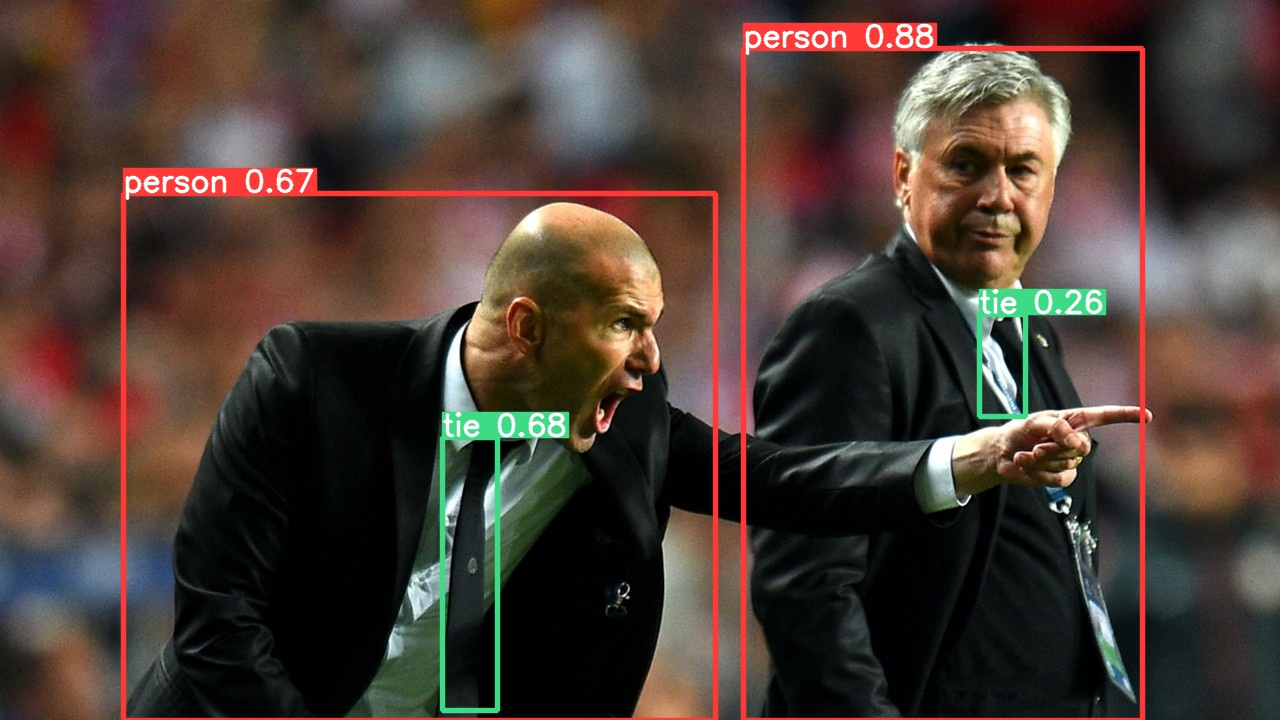

In [58]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)